In [ ]:
import logging
import heapq
from ast import literal_eval
from datetime import datetime
from scipy.spatial import Delaunay
from tqdm import tqdm, trange
import tracemalloc
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import time
import os
import statistics
import atexit
import socket

### Some tests on graphs

In [ ]:
# Example with gnm_random_graph
n = 10
m = 15

G_gnm = nx.gnm_random_graph(n, m, seed=99)

# Example with dense_gnm_random_graph
G_dense_gnm = nx.dense_gnm_random_graph(n, m, seed=99)

# Plot the graphs
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
nx.draw(G_gnm, with_labels=True, font_weight='bold', node_color='skyblue')
plt.title('gnm_random_graph')

plt.subplot(1, 2, 2)
nx.draw(G_dense_gnm, with_labels=True, font_weight='bold', node_color='lightcoral')
plt.title('dense_gnm_random_graph')

plt.show()


In [ ]:
# Example with path_graph
n = 20
path_graph = nx.path_graph(n)

# Plot the graph
plt.figure(figsize=(4, 3))
nx.draw(path_graph, with_labels=True, font_weight='bold', node_color='skyblue')
plt.title(f'Path Graph (n={n})')
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example: 3 by 4 2D grid graph
m, n = 4, 5
grid_graph = nx.grid_2d_graph(m, n)

# Assigning single numbers to nodes
for (i, j) in grid_graph.nodes:
    grid_graph.nodes[(i, j)]['label'] = i * n + j

# Visualization
pos = nx.spring_layout(grid_graph)  # You can use other layout algorithms as well
labels = nx.get_node_attributes(grid_graph, 'label')
plt.figure(figsize=(4, 3))
nx.draw(grid_graph, pos, with_labels=True, labels=labels, font_weight='bold', node_color='skyblue')
plt.title(f'{m} by {n} 2D Grid Graph with Single Number Labels')
plt.show()


In [ ]:
# Example: Random regular graph with degree 3 and 10 nodes
degree = 8 # 1 -> n-1
num_nodes = 15
random_regular_graph = nx.random_regular_graph(degree, num_nodes)

# Plot the graph
plt.figure(figsize=(4, 3))
nx.draw(random_regular_graph, with_labels=True, font_weight='bold', node_color='skyblue')
plt.title(f'Random Regular Graph (Degree {degree}, {num_nodes} Nodes)')

plt.show()


In [ ]:
# Example: Delaunay triangulation graph with 10 random points and max 3 edges per node
num_points = 15
# Generate random points
points = np.random.rand(num_points, 2)
tri = Delaunay(points)

# Get edges from the Delaunay triangulation
edges = set()
for simplex in tri.simplices:
    for i in range(3):
        edges.add((simplex[i], simplex[(i + 1) % 3]))

# Create a graph with all edges from Delaunay triangulation
delaunay_graph = nx.Graph(list(edges))

# Plot the Delaunay triangulation graph
plt.figure(figsize=(4, 3))
nx.draw(delaunay_graph, pos={i: points[i] for i in range(num_points)},
        with_labels=True, font_weight='bold', node_color='lightcoral')
plt.title(f'Delaunay Triangulation Graph')

print(delaunay_graph)
plt.show()

### Graph Generation

consider that $min edges = n \cdot 2$ and $max edges = \frac{n \cdot (n - 1)}{2}$ where $n$ is the number of nodes


In [ ]:
# Global variables for weight range
min_weight = 0.01
max_weight = 1.0
decimal_places = 3

def generate_random_graph(nodes, edges, seed=112233):
    max_edges = nodes * (nodes - 1) // 2
    if edges >= max_edges:
        print("WARNING: Random graph - Number of edges exceeds the maximum possible for a random graph.")
    edges = min(edges, max_edges)

    G_gnm = nx.gnm_random_graph(nodes, edges, seed)

    # Assign random weights to edges
    for edge in G_gnm.edges():
        G_gnm[edge[0]][edge[1]]['weight'] = round(np.random.uniform(min_weight, max_weight), decimal_places)

    return G_gnm

def generate_dense_random_graph(nodes, edges, seed=112233):
    max_edges = nodes * (nodes - 1) // 2
    if edges >= max_edges:
        print("WARNING: Dense random graph - Number of edges exceeds the maximum possible for a dense graph.")
    edges = min(edges, max_edges)
    
    G_dense_gnm = nx.dense_gnm_random_graph(nodes, edges, seed)

    # Assign random weights to edges
    for edge in G_dense_gnm.edges():
        G_dense_gnm[edge[0]][edge[1]]['weight'] = round(np.random.uniform(min_weight, max_weight), decimal_places)

    return G_dense_gnm

def generate_2d_grid_graph(m_nodes, n_nodes, seed=None):
    G_grid = nx.grid_2d_graph(m_nodes, n_nodes)

    G = nx.Graph()

    # Assigning single numbers to nodes
    for (i, j) in G_grid.nodes:
        G.add_node(i * n_nodes + j)
    
    for ((i, j), (k, h)) in G_grid.edges:
        G.add_edge(i * n_nodes + j, k * n_nodes + h)

    # Assign random weights to edges
    for edge in G.edges():
        G[edge[0]][edge[1]]['weight'] = round(np.random.uniform(min_weight, max_weight), decimal_places)

    return G

def generate_random_regular_graph(nodes, degree, seed=112233):
    max_degree = nodes - 1
    if degree >= max_degree:
        print("WARNING: Random regular graph - The degree exceeds the maximum degree.")
    
    degree = min(degree, nodes - 1) if degree % 2 == 0 else min(degree - 1, nodes - 1)
    
    random_regular_graph = nx.random_regular_graph(degree, nodes, seed)

    # Assign random weights to edges
    for edge in random_regular_graph.edges():
        random_regular_graph[edge[0]][edge[1]]['weight'] = round(np.random.uniform(min_weight, max_weight), decimal_places)

    return random_regular_graph

def generate_delaunay_graph(num_nodes, seed=112233):
    np.random.seed(seed)  # Set seed for NumPy's random number generator

    points = np.random.rand(num_nodes, 2)
    tri = Delaunay(points)

    edges = set()
    for simplex in tri.simplices:
        for i in range(3):
            edges.add((simplex[i], simplex[(i + 1) % 3]))

    delaunay_graph = nx.Graph(list(edges))

    # Assign random weights to edges
    for edge in delaunay_graph.edges():
        delaunay_graph[edge[0]][edge[1]]['weight'] = round(np.random.uniform(min_weight, max_weight), decimal_places)

    return delaunay_graph

In [ ]:
# Example usage:
num_nodes = 10
num_edges = 15

# Generate graphs
random_graph = generate_random_graph(num_nodes, num_edges)
dense_random_graph = generate_dense_random_graph(num_nodes, num_edges)
grid_graph = generate_2d_grid_graph(3, 4)
degree = 4
random_regular_graph = generate_random_regular_graph(num_nodes, degree)
delaunay_graph = generate_delaunay_graph(num_nodes)

# Plot graphs on a grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot random graph
axes[0, 0].set_title('Random Graph')
edge_weights = nx.get_edge_attributes(random_graph, 'weight')
pos = nx.spring_layout(random_graph) 
nx.draw(random_graph, pos, ax=axes[0, 0], with_labels=True, font_weight='bold', node_color='lightcoral')
nx.draw_networkx_edge_labels(random_graph, pos, ax=axes[0, 0], edge_labels=edge_weights)

# Plot dense random graph
axes[0, 1].set_title('Dense Random Graph')
edge_weights = nx.get_edge_attributes(dense_random_graph, 'weight')
pos = nx.spring_layout(dense_random_graph) 
nx.draw(dense_random_graph, pos, ax=axes[0, 1], with_labels=True, font_weight='bold', node_color='lightcoral')
nx.draw_networkx_edge_labels(dense_random_graph, pos, ax=axes[0, 1], edge_labels=edge_weights)

# Plot 2D grid graph
axes[0, 2].set_title('2D Grid Graph')
edge_weights = nx.get_edge_attributes(grid_graph, 'weight')
pos = nx.spring_layout(grid_graph)
nx.draw(grid_graph, pos, ax=axes[0, 2], with_labels=True, font_weight='bold', node_color='lightcoral')
nx.draw_networkx_edge_labels(grid_graph, pos, ax=axes[0, 2], edge_labels=edge_weights)

# Plot random regular graph
axes[1, 0].set_title('Random Regular Graph')
edge_weights = nx.get_edge_attributes(random_regular_graph, 'weight')
pos = nx.spring_layout(random_regular_graph) 
nx.draw(random_regular_graph, pos, ax=axes[1, 0], with_labels=True, font_weight='bold', node_color='lightcoral')
nx.draw_networkx_edge_labels(random_regular_graph, pos, ax=axes[1, 0], edge_labels=edge_weights)

# Plot Delaunay triangulation graph
axes[1, 1].set_title('Delaunay Triangulation Graph')
edge_weights = nx.get_edge_attributes(delaunay_graph, 'weight')
pos = nx.spring_layout(delaunay_graph)
nx.draw(delaunay_graph, pos, ax=axes[1, 1], with_labels=True, font_weight='bold', node_color='lightcoral')
nx.draw_networkx_edge_labels(delaunay_graph, pos, ax=axes[1, 1], edge_labels=edge_weights)

# Hide the empty subplot in the last row and last column
axes[1, 2].axis('off')

plt.show()

### Utilities

In [ ]:
def find_nearest_factors(num_nodes):
    # Find the nearest factors m and n such that m * n is close to num_nodes
    for i in range(int(num_nodes**0.5), 0, -1):
        if num_nodes % i == 0:
            return i, num_nodes // i

In [ ]:
num_nodes = 125
m_nodes, n_nodes = find_nearest_factors(num_nodes)

print(f"{m_nodes}, {n_nodes} -> {m_nodes * n_nodes} - required nodes: {num_nodes}")

In [ ]:
def linearize_graph(graph_instance):
    adjacency_matrix = nx.adjacency_matrix(graph_instance).todense()
    linearized_matrix = np.asarray(adjacency_matrix).reshape(-1).tolist()
    return linearized_matrix

def unlinearize_graph(linearized_matrix):
    # Assuming the linearized_matrix is a list
    matrix_size = int(len(linearized_matrix)**0.5)
    adjacency_matrix = np.asarray(linearized_matrix).reshape((matrix_size, matrix_size))
    restored_graph = nx.Graph(adjacency_matrix)
    return restored_graph

# Example usage:
num_nodes = 5
G = generate_delaunay_graph(num_nodes)
linearized_representation = linearize_graph(G)
print(linearized_representation)
restored_graph = unlinearize_graph(linearized_representation)
print(nx.adjacency_matrix(restored_graph))

In [ ]:
def calculate_max_path_length(graph):
    max_steps = 0

    for node in graph.nodes:
        # Use networkx's single_source_dijkstra_path_length to get the path lengths from the current node
        path_lengths = nx.single_source_dijkstra_path_length(graph, node)

        # Update max_steps if a longer path is found
        max_steps = max(max_steps, max(path_lengths.values()))

    return max_steps

In [ ]:
def extract_starting_and_target_nodes(graph):
    list_of_nodes = list(graph.nodes())
    while True:
        # Randomly select a starting node
        starting_node = np.random.choice(list_of_nodes)
        # Randomly select a target node
        target_node = np.random.choice(list_of_nodes)
        # Check if target is reachable from the starting node
        if nx.has_path(graph, starting_node, target_node):
            # If reachable, return the starting node, target node, and path length
            path_length = nx.shortest_path_length(graph, starting_node, target_node)
            return starting_node, target_node, path_length

# Example usage:
num_nodes = 100
G = generate_random_regular_graph(num_nodes, 4) # generate_dense_random_graph

result = extract_starting_and_target_nodes(G)
if result:
    starting_node, target_node, path_length = result
    print(f"Starting Node: {starting_node}, Target Node: {target_node}, Path Length: {path_length}")
else:
    print("No reachable target found within the specified number of trials.")

pos = nx.spring_layout(G)  # You can use other layout algorithms as well
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels, font_weight='bold', node_color='skyblue')
plt.show()

### System time checks

In [ ]:
def measure_smallest_delta():
    """
    Measures the smallest time interval between consecutive calls of time

    Returns:
        tuple: (start_time, end_time, delta_time)
    """
    #start_time = time.monotonic()
    start_time = time.perf_counter()
    end_time = start_time
    while end_time == start_time:
        #end_time = time.monotonic()
        end_time = time.perf_counter()
    delta_time = end_time - start_time
    return start_time, end_time, delta_time

def estimate_precision(num_samples):
    """
    Estimates the precision of the system clock by averaging the smallest time intervals.
    Args:
        num_samples: Number of samples to collect.
    """
    smallest_deltas = [measure_smallest_delta()[2] for _ in range(num_samples)]
    average_precision = np.average(smallest_deltas)
    return average_precision

In [ ]:
# System timing settings
TIMER_RESOLUTION_SAMPLES = 1000
RELATIVE_ERROR_MEASURE = 0.01

resolution = estimate_precision(TIMER_RESOLUTION_SAMPLES)
min_duration = resolution * ((1.0 / RELATIVE_ERROR_MEASURE) + 1.0)

print(f"Precision of clock: {resolution:.8f}")

print(f"With a relative error of {RELATIVE_ERROR_MEASURE:.2f}, need to measure at least a time of {min_duration:.8f} seconds.")

In [ ]:
def check_time_taken(graph, algorithm, start, target, avg_samples, min_duration):
    """
    Measure the time and memory taken for multiple runs of a given algorithm on a graph and return aggregated results.

    Args:
        graph: The graph on which the operation is performed.
        algorithm: The algorithm/function to measure the time for.
        start: Starting node or parameter for the operation.
        target: Target node or parameter for the operation.
        avg_samples: Number of samples to collect for calculating mean and std.
        min_duration: Min duration for each time measurement.

    Returns:
        Tuple[float, float, float, float, float, float, float]: Aggregated results including average count of repetitions,
        average duration, median duration, standard deviation, average memory used, median memory used, and std memory used.
    """

    results = []

    # Checks time and memory taken multiple times
    for _ in range(avg_samples):
        start_time, end_time, count, duration, memory_used = check_time_taken_single_run(graph, algorithm, start, target, min_duration)
        results.append((start_time, end_time, count, duration, memory_used))

    # Extract relevant information for aggregation
    durations = [item[3] for item in results]
    memories = [item[4] for item in results]

    # Calculate aggregated values
    avg_duration = sum(durations) / len(durations)
    median_duration = sorted(durations)[len(durations) // 2]
    std_duration = np.std(durations)

    avg_memory_used = sum(memories) / len(memories)
    median_memory_used = sorted(memories)[len(memories) // 2]
    std_memory_used = np.std(memories)

    # Return the aggregated results as a tuple
    return avg_duration, median_duration, std_duration, avg_memory_used, median_memory_used, std_memory_used


def check_time_taken_single_run(graph, algorithm, start, target, min_duration):
    """
    Measure the time taken for a single run of a given algorithm on a graph.

    Args:
        graph: The graph on which the operation is performed.
        algorithm: The algorithm/function to measure the time for.
        start: Starting node or parameter for the operation.
        target: Target node or parameter for the operation.

    Returns:
        Tuple[float, float, int, float]: Start time, End time, Count of repetitions, Duration of the operation.
    """
    tracemalloc.start()
    count = 0  # Counter for the number of repetition
    start_time = end_time = 0.0 # Initialize start and end time
    start_time = time.perf_counter()
    while end_time - start_time <= min_duration: # Loop until we get to the min duration
        algorithm(graph, start, target) # Execute the algorithm
        end_time = time.perf_counter()
        count += 1 # Keep a counter to know how many loops we performed
    current, peak = tracemalloc.get_traced_memory()
    #print(f"Current memory: {current}, Peak memory: {peak}")
    tracemalloc.clear_traces()
    # Return the results as a tuple
    # save peak if you are concerned about the maximum memory footprint of your code
    # save current if you are interested in the memory usage at a specific moment,
    return (start_time, end_time, count, end_time - start_time, peak)

### Algorithms

In [ ]:
def get_neighbours(g, v):
    return [i for x,i in zip(g[v,:],range(g.shape[0])) if x>0]

In [ ]:
def astar_alg(g, source, target):
    n_nodes = g.shape[0]

    dist = [math.inf] * n_nodes
    dist[source] = 0

    prev = [None] * n_nodes
    heap = [(dist[source], source)]

    while heap:
        _, u = heapq.heappop(heap)

        if u == target:
            path = []
            while u is not None:
                path.insert(0, u)
                u = prev[u]
            return path

        for v in get_neighbours(g, u):
            alt = dist[u] + g[u, v]  # Assuming a uniform cost for all edges

            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
                heapq.heappush(heap, (alt, v))

    return None  # No path found

In [ ]:
from queue import PriorityQueue
import math

def dijkstra_alg_legacy(g, source, target):
    n_card=g.shape[0]

    dist = [math.inf]*n_card
    dist[source] = 0

    prev = [None]*n_card
    q = PriorityQueue()
        
    q.put((dist[source], source))
    
    while not q.empty():
        _,u=q.get()
        for v in get_neighbours(g, u):
            alt = dist[u]+g[u,v]
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
                if v not in q.queue:
                    q.put((alt, v))
    
    return dist, prev

In [21]:
import numpy as np
import heapq

def dijkstra_alg(g, source, target):
    n_nodes = len(g)
    
    dist = [float('inf')] * n_nodes
    dist[source] = 0

    prev = [None] * n_nodes
    pq = [(0, source)]  # Priority queue using heapq
    
    while pq:
        current_dist, u = heapq.heappop(pq)

        if current_dist > dist[u]:
            continue

        for v in get_neighbours(g, u):
            alt = dist[u] + g[u, v]
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
                heapq.heappush(pq, (alt, v))

    return dist, prev


# Example usage:
g = np.array([
    [0, 1, 2, 3, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 1],
    [2, 0, 0, 0, 0, 0, 1],
    [3, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 7],
    [0, 1, 1, 0, 1, 7, 0]
])

print(g)

distances, previous_nodes = dijkstra_alg(g, 0, 5)
print("Shortest distances:", distances)
print("Previous nodes:", previous_nodes)


[[0 1 2 3 0 0 0]
 [1 0 0 1 0 0 1]
 [2 0 0 0 0 0 1]
 [3 1 0 0 1 0 0]
 [0 0 0 1 0 0 1]
 [0 0 0 0 0 0 7]
 [0 1 1 0 1 7 0]]
Shortest distances: [0, 1, 2, 2, 3, 9, 2]
Previous nodes: [None, 0, 0, 1, 3, 6, 1]


In [22]:
from queue import Queue
import math

def bfs_alg(g, source, target):
    n_card=g.shape[0]

    explored=[False]*n_card
    prev = [None]*n_card
    
    q = Queue()
    explored[source]=True
        
    q.put(source)
    
    while not q.empty():
        u=q.get()

        if u==target:
            return prev

        for v in get_neighbours(g, u):
            if not explored[v]:
                explored[v]=True
                prev[v] = u
                
                q.put(v)
        
    return None

# Example usage:
g = np.array([
    [0, 1, 2, 3, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 1],
    [2, 0, 0, 0, 0, 0, 1],
    [3, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 7],
    [0, 1, 1, 0, 1, 7, 0]
])

print(g)

path = bfs_alg(g, 0, 5)
print("Shortest path:", path)

[[0 1 2 3 0 0 0]
 [1 0 0 1 0 0 1]
 [2 0 0 0 0 0 1]
 [3 1 0 0 1 0 0]
 [0 0 0 1 0 0 1]
 [0 0 0 0 0 0 7]
 [0 1 1 0 1 7 0]]
Shortest path: [None, 0, 0, 0, 3, 6, 1]


In [23]:
from queue import LifoQueue

def dfs_alg(g, source, target):
    n_card = g.shape[0]

    explored = [False] * n_card
    prev = [None] * n_card

    stack = LifoQueue()
    explored[source] = True

    stack.put(source)

    while not stack.empty():
        u = stack.get()

        if u == target:
            return prev

        for v in get_neighbours(g, u):
            if not explored[v]:
                explored[v] = True
                prev[v] = u

                stack.put(v)
    
    return None

# Example usage:
g = np.array([
    [0, 1, 2, 3, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 1],
    [2, 0, 0, 0, 0, 0, 1],
    [3, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 7],
    [0, 1, 1, 0, 1, 7, 0]
])

print(g)

path = dfs_alg(g, 0, 5)
print("Shortest path:", path)

[[0 1 2 3 0 0 0]
 [1 0 0 1 0 0 1]
 [2 0 0 0 0 0 1]
 [3 1 0 0 1 0 0]
 [0 0 0 1 0 0 1]
 [0 0 0 0 0 0 7]
 [0 1 1 0 1 7 0]]
Shortest path: [None, 0, 0, 0, 3, 6, 4]



Testing with 10 nodes and 50 edges:
Time taken: 0.0009989738464355469

Testing with 15 nodes and 75 edges:
Time taken: 0.0009996891021728516

Testing with 20 nodes and 100 edges:
Time taken: 0.0019996166229248047

Testing with 25 nodes and 125 edges:
Time taken: 0.003000974655151367

Testing with 30 nodes and 150 edges:
Time taken: 0.0010013580322265625

Testing with 35 nodes and 175 edges:
Time taken: 0.002999544143676758

Testing with 40 nodes and 200 edges:
Time taken: 0.0020046234130859375

Testing with 45 nodes and 225 edges:
Time taken: 0.0030007362365722656

Testing with 50 nodes and 250 edges:
Time taken: 0.0030040740966796875

Testing with 55 nodes and 275 edges:
Time taken: 0.004000186920166016

Testing with 60 nodes and 300 edges:
Time taken: 0.003000497817993164

Testing with 65 nodes and 325 edges:
Time taken: 0.004999399185180664

Testing with 70 nodes and 350 edges:
Time taken: 0.0060007572174072266

Testing with 75 nodes and 375 edges:
Time taken: 0.006001472473144531


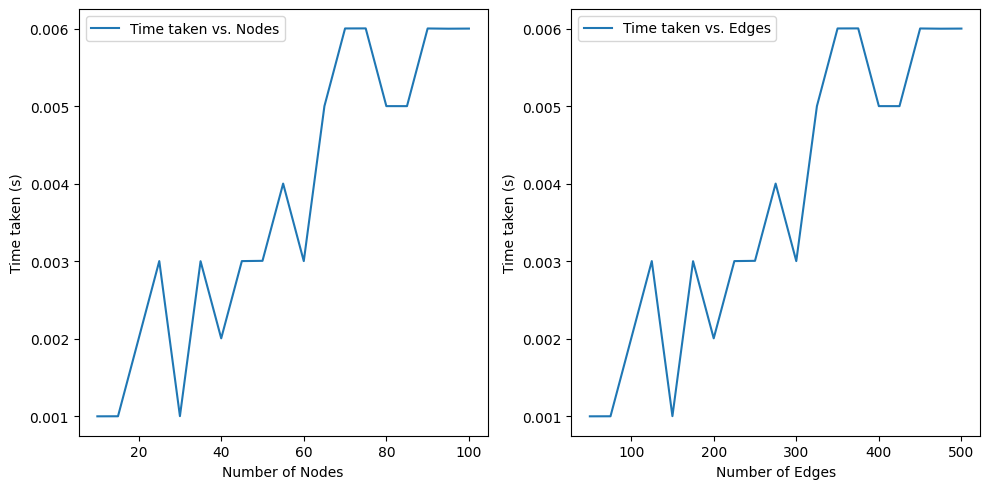

In [24]:
# Define ranges and increments
num_nodes_range = range(10, 101, 5)

# Lists to store results
time_taken_nodes = []
time_taken_edges = []

# Algorithm to check
algo = dfs_alg

for num_nodes in num_nodes_range:
    num_edges = int(num_nodes * 5)  # Adjust the multiplier as needed
    print(f"\nTesting with {num_nodes} nodes and {num_edges} edges:")
        
    # Generate a random dense graph
    G = generate_dense_random_graph(num_nodes, num_edges)

    # Choose two random nodes
    nodes = list(G.nodes())
    source_node = np.random.choice(nodes)
    target_node = np.random.choice(nodes)

    # Apply Dijkstra's algorithm
    start_time = time.time()
    shortest_path = dijkstra_alg(nx.adjacency_matrix(G).toarray(), source_node, target_node)
    end_time = time.time()

    time_taken_nodes.append(end_time - start_time)
    time_taken_edges.append(num_edges)

    #print("Source Node:", source_node)
    #print("Target Node:", target_node)
    # print("Shortest Path:", shortest_path)
    print("Time taken:", end_time - start_time)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(list(num_nodes_range), time_taken_nodes, label="Time taken vs. Nodes")
plt.xlabel('Number of Nodes')
plt.ylabel('Time taken (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_taken_edges, time_taken_nodes, label="Time taken vs. Edges")
plt.xlabel('Number of Edges')
plt.ylabel('Time taken (s)')
plt.legend()

plt.tight_layout()
plt.show()

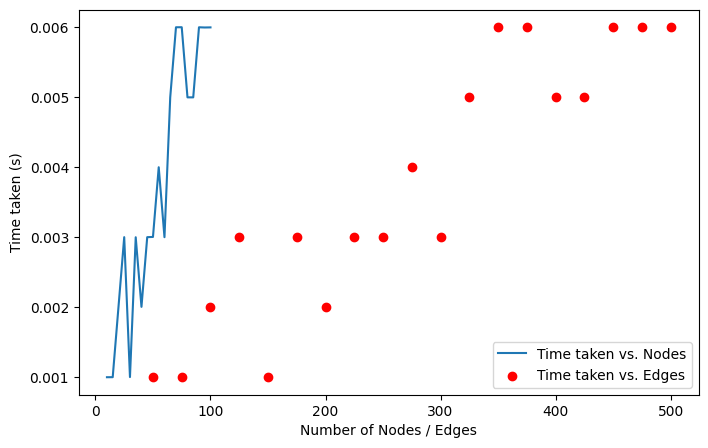

In [25]:
# Plot the results on the same graph
plt.figure(figsize=(8, 5))

plt.plot(list(num_nodes_range), time_taken_nodes, label="Time taken vs. Nodes")
plt.scatter(time_taken_edges, time_taken_nodes, label="Time taken vs. Edges", color='red')
plt.xlabel('Number of Nodes / Edges')
plt.ylabel('Time taken (s)')
plt.legend()

plt.show()

### Instances generation

In [26]:
def calculate_graph_size_features(graph):
    num_nodes = len(graph.nodes)
    num_edges = len(graph.edges)

    return {
        'nodes': num_nodes,
        'edges': num_edges,
        'ratio_n_m': num_nodes / num_edges,
        'ratio_m_n': num_edges / num_nodes,
        'density': 2 * num_edges / (num_nodes * (num_nodes - 1))
    }

def calculate_node_degree_stats(graph):
    degrees = list(dict(graph.degree()).values())
    degrees_np = np.array(degrees)

    unique_degrees, counts = np.unique(degrees_np, return_counts=True)

    entropy_term = np.fromiter((p * np.log2(p) for p in (np.count_nonzero(degrees_np == x) / len(degrees_np) for x in set(degrees_np))), dtype=float)
    
    return {
        'min_degree': np.min(degrees_np),
        'max_degree': np.max(degrees_np),
        'mean_degree': np.mean(degrees_np),
        'median_degree': np.median(degrees_np),
        'q0.25_degree': np.percentile(degrees_np, 25),
        'q0.75_degree': np.percentile(degrees_np, 75),
        'variation_coefficient_degree': np.std(degrees_np) / np.mean(degrees_np),
        'entropy_degree': -np.sum(entropy_term)
    }

def calculate_maximal_clique_stats(graph, num_nodes):
    cliques = list(map(len, nx.enumerate_all_cliques(graph)))
    return {
        'normalized_min_clique_size': min(cliques) / num_nodes,
        'normalized_max_clique_size': max(cliques) / num_nodes,
        'normalized_median_clique_size': statistics.median(cliques) / num_nodes,
        'normalized_q0.25_clique_size': statistics.quantiles(cliques, n=4)[0] / num_nodes,
        'normalized_q0.75_clique_size': statistics.quantiles(cliques, n=4)[2] / num_nodes,
        'normalized_variation_coefficient_clique_size': statistics.stdev(cliques) / statistics.mean(cliques),
        'normalized_entropy_clique_size': -sum(p * math.log2(p) for p in (cliques.count(x) / len(cliques) for x in set(cliques))) / num_nodes
    }

In [27]:
def manage_persistent_save(path, filename, instances):
    # Check if the folder exists, create it if not
    if not os.path.exists(path):
        os.makedirs(path)

    # Create a DataFrame
    df = pd.DataFrame(instances)

    # Define the CSV file path\n",
    csv_file_path = os.path.join(path, filename)

    # Check if the file already exists\n",
    if os.path.isfile(csv_file_path):
        # If the file exists, append to it without writing headers\n",
        df.to_csv(csv_file_path, mode='a', index=False, header=False)
    else:
        # If the file doesn't exist, create a new file with headers\n",
        df.to_csv(csv_file_path, index=False)

In [28]:
# Number of loops to get times
def calculate_trials(num_nodes):
    # Adjust the constant as needed
    constant = 1500
    trials = max(3, int(constant / num_nodes))
    return trials

def generate_instance(num_nodes, min_edges_factor=0.5, max_edges_factor=1.0, seed=None):
    min_edges = int(min_edges_factor * num_nodes)
    max_edges = int(max_edges_factor * num_nodes * (num_nodes - 1) // 2)

    num_edges = np.random.randint(min_edges, max_edges)

    # Randomly select a graph type
    graph_types = [
        #generate_random_graph,
        #generate_dense_random_graph,
        generate_2d_grid_graph,
        #generate_random_regular_graph,
        generate_delaunay_graph
    ]

    selected_graph_type = np.random.choice(graph_types)

    # Generate and return the graph instance
    if selected_graph_type == generate_random_graph:
        return selected_graph_type.__name__, selected_graph_type(num_nodes, num_edges, seed=seed)
        
    elif selected_graph_type == generate_dense_random_graph:
        return selected_graph_type.__name__, selected_graph_type(num_nodes, num_edges, seed=seed)

    elif selected_graph_type == generate_2d_grid_graph:
        m_nodes, n_nodes = find_nearest_factors(num_nodes)
        return selected_graph_type.__name__, selected_graph_type(m_nodes, n_nodes, seed=seed)

    elif selected_graph_type == generate_random_regular_graph:
        degree = np.random.randint(5, 10)
        return selected_graph_type.__name__, selected_graph_type(num_nodes, degree, seed=seed)

    elif selected_graph_type == generate_delaunay_graph:
        return selected_graph_type.__name__, selected_graph_type(num_nodes, seed=seed)

def generate_instances_with_metrics(path, filename, batch_save_size, algorithms, num_instances, min_nodes, max_nodes, step, min_edges_factor=0.5, max_edges_factor=1.0, seed=None):
    instances = []

    total_batches = num_instances // batch_save_size

    start_node = min_nodes
    try:
        for batch_idx in range(1, total_batches + 1):
            for instance_in_batch in tqdm(range(1, batch_save_size + 1), desc=f"Generating Instances (Batch {batch_idx}/{total_batches})"):
                instance_idx = (batch_idx - 1) * batch_save_size + instance_in_batch
                try:
                    start_time = time.time()

                    # Calculate the number of nodes for the current instance
                    num_nodes = start_node + (instance_idx - 1) * step
                    graph_type, graph_instance = generate_instance(num_nodes, min_edges_factor, max_edges_factor, seed)

                    # Log the time taken for graph generation
                    current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
                    logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] Graph generation time: {time.time() - start_time:.4f} seconds")

                    start_time = time.time()

                    # Print or log the graph size information
                    num_nodes = len(graph_instance.nodes())
                    num_edges = len(graph_instance.edges())
                    starting_node, target_node, path_length = extract_starting_and_target_nodes(graph_instance)

                    current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
                    logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] Graph generation type: {graph_type}")
                    logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] Graph Size: {num_nodes} Nodes, {num_edges} Edges")
                    logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] Starting node {starting_node}, Target node {target_node}")

                    # Calculate additional metrics
                    current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
                    logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] Calculating metrics ...")
                    graph_size_features = calculate_graph_size_features(graph_instance)
                    node_degree_stats = calculate_node_degree_stats(graph_instance)

                    # Adjust the number of trials based on the size of the graph
                    trials = calculate_trials(num_nodes)

                    # Measure time and memory for each algorithm
                    algorithm_metrics = {}
                    for algorithm in algorithms:
                        start_algorithm_time = time.time()
                        current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
                        logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] Running {algorithm.__name__} ({trials} trials for the AVG metrics) ...")

                        adjacency_matrix_graph = nx.adjacency_matrix(graph_instance).toarray()
                        avg_duration, median_duration, std_duration, avg_memory_used, median_memory_used, std_memory_used = check_time_taken(
                            adjacency_matrix_graph, algorithm, starting_node, target_node, avg_samples=trials, min_duration=min_duration)

                        # Save the metrics to the dictionary
                        algorithm_metrics[f'{algorithm.__name__}_avg_duration'] = avg_duration
                        algorithm_metrics[f'{algorithm.__name__}_median_duration'] = median_duration
                        algorithm_metrics[f'{algorithm.__name__}_std_duration'] = std_duration
                        algorithm_metrics[f'{algorithm.__name__}_avg_memory_used'] = avg_memory_used
                        algorithm_metrics[f'{algorithm.__name__}_median_memory_used'] = median_memory_used
                        algorithm_metrics[f'{algorithm.__name__}_std_memory_used'] = std_memory_used

                        current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
                        logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] {algorithm.__name__} time taken: {time.time() - start_algorithm_time:.4f} seconds")

                    # Save the instance details to a dictionary
                    instance_details = {
                        'graph_type': graph_type,
                        'num_nodes': num_nodes,
                        'num_edges': num_edges,
                        **graph_size_features,
                        'starting_node': starting_node,
                        'target_node': target_node,
                        'path_length': path_length,
                        **node_degree_stats,
                        **algorithm_metrics,
                        # Add other metrics as needed
                    }

                    instances.append(instance_details)

                    # If the code reaches this point without any exceptions, break out of the loop
                    current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
                    logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] Instance generated successfully. Time taken: {time.time() - start_time:.4f} seconds")

                    # Check if it's time to save a batch
                    if len(instances) >= batch_save_size:
                        manage_persistent_save(path, filename, instances)
                        instances.clear()

                except Exception as e:
                    # Handle the exception (print or log the error, decide whether to retry or terminate)
                    current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
                    logging.info(f"[{current_timestamp}][Instance {instance_idx}/{num_instances}][Batch {batch_idx}/{total_batches}] Exception encountered: {e}")
    except KeyboardInterrupt:
        # Handle keyboard interrupt and log a message
        current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
        logging.error(f"[{current_timestamp}] Keyboard interrupt received. Script interrupted by user.")
        log_premature_termination()
        raise  # Re-raise the KeyboardInterrupt after logging
    print("All instances generated successfully.")

def log_premature_termination():
    current_timestamp = datetime.now().strftime("%Y%m%d-%H%M%S.%f")
    logging.error(f"[{current_timestamp}] Script terminated prematurely.")
    # Close the log
    logging.shutdown()

In [29]:
# Get the machine's name or ID
machine_name = socket.gethostname()

# Example usage:
total_instances = 1000
batch_save_size = 10

min_nodes = 100
max_nodes = 1000
step_size = math.ceil((max_nodes - min_nodes) / total_instances)

min_edges_factor = 0.01
max_edges_factor = 0.20

seed = 951699 + i
# graph topology has seed, starting and target point random

# Specify the folder path
folder_path = './data/'

# Generate a timestamp for the log file name
log_file_path = f'data/instance_generation_{machine_name}.log'
instances_filename = f'graph_instances_{machine_name}.csv'

# Ensure the directory exists
log_directory = os.path.dirname(log_file_path)
os.makedirs(log_directory, exist_ok=True)

# Configure the logging
logging.basicConfig(filename=log_file_path, level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Algorithms to run
algorithms = [astar_alg, dijkstra_alg, bfs_alg, dfs_alg]
generate_instances_with_metrics(
    folder_path, instances_filename, batch_save_size, algorithms, total_instances, min_nodes, max_nodes, step_size, min_edges_factor, max_edges_factor, seed)

# Close the log
logging.shutdown()

Generating Instances (Batch 1/100):   0%|          | 0/10 [00:00<?, ?it/s]

Generating Instances (Batch 66/100):  90%|█████████ | 9/10 [00:56<00:05,  5.98s/it]

In [ ]:
# Close the log
logging.shutdown()